## Linear Regression = predict continuous values

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).

When there is a single input variable (x), the method is referred to as simple linear regression. When there are multiple input variables, literature from statistics often refers to the method as multiple linear regression.

First, the regression might be used to identify the strength of the effect that the independent variable(s) have on a dependent variable.  Typical questions are what is the strength of relationship between dose and effect, sales and marketing spending, or age and income.

Second, it can be used to forecast effects or impact of changes.  That is, the regression analysis helps us to understand how much the dependent variable changes with a change in one or more independent variables.  A typical question is, “how much additional sales income do I get for each additional $1000 spent on marketing?”

## Types of Linear Regression:

- Simple linear regression
  - 1 dependent variable (interval or ratio), 1 independent variable (interval or ratio or dichotomous)

- Multiple linear regression
  - 1 dependent variable (interval or ratio) , 2+ independent variables (interval or ratio or dichotomous)

- Logistic regression
  - 1 dependent variable (dichotomous), 2+ independent variable(s) (interval or ratio or dichotomous)

- Ordinal regression
  - 1 dependent variable (ordinal), 1+ independent variable(s) (nominal or dichotomous)

- Multinomial regression
  - 1 dependent variable (nominal), 1+ independent variable(s) (interval or ratio or dichotomous)

- Discriminant analysis
  - 1 dependent variable (nominal), 1+ independent variable(s) (interval or ratio)


Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line, while logistic and nonlinear regression models use a curved line. Regression allows you to estimate how a dependent variable changes as the independent variable(s) change.

Simple linear regression is used to estimate the relationship between two quantitative variables. You can use simple linear regression when you want to know:

How strong the relationship is between two variables (e.g. the relationship between rainfall and soil erosion).
The value of the dependent variable at a certain value of the independent variable (e.g. the amount of soil erosion at a certain level of rainfall).

### Links: 
https://www.scribbr.com/statistics/simple-linear-regression/#:~:text=What%20is%20simple%20linear%20regression,Both%20variables%20should%20be%20quantitative.
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/
https://www.ibm.com/topics/linear-regression

Simple linear regression formula is:

<img src="https://cdn.scribbr.com/wp-content/uploads/2020/02/simple-linear-regression-formula.png"/>

- y is the predicted value of the dependent variable (y) for any given value of the independent variable (x).
- B0 is the intercept, the predicted value of y when the x is 0.
- B1 is the regression coefficient – how much we expect y to change as x increases.
- x is the independent variable ( the variable we expect is influencing y).
- e is the error of the estimate, or how much variation there is in our estimate of the regression coefficient.

Linear regression finds the line of best fit line through your data by searching for the regression coefficient (B1) that minimizes the total error (e) of the model.

In [5]:
# import a dataset from pycaret
# PyCaret also hosts the repository of open source datasets that were used throughout the documentation 
# for demonstration purposes. 
# These are hosted on PyCaret’s github and can also be directly loaded using pycaret.datasets module.
from pycaret.datasets import get_data

In [6]:
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [7]:
dataset.tail()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206
5999,2.19,Ideal,E,VS1,EX,EX,GIA,30507


In [8]:
dataset.shape # rows and cols

(6000, 8)

In [9]:
dataset.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'],
      dtype='object')

In [10]:
dataset.describe() # invoke only numerical data

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


**random_state** is basically used for reproducing your problem the same every time it is run. If you do not use a random_state in train_test_split, every time you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue.

random_state  sets a seed to the random generator, so that the train-test splits are always deterministic. If you don't set a seed, it is different each time.

if a fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

In [11]:
# price is the target variable we must predict
# split into test and train
data_train = dataset.sample(frac=0.9, random_state=786) #random sample, frac = fraction 90% for train. random_state = 786

In [12]:
data_train.shape # 90% of data

(5400, 8)

In [13]:
data_train.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5333,1.50,Good,E,VS2,VG,G,GIA,12702
3749,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2376,2.25,Good,I,VS2,G,VG,GIA,18623
3756,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4248,1.20,Ideal,F,VS1,EX,EX,GIA,9641


In [14]:
data_test = dataset.drop(data_train.index) # removing all sample that are already been taken by the train

In [15]:
data_test.shape

(600, 8)

In [16]:
data_test.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
5,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
7,1.50,Fair,F,SI1,VG,VG,GIA,10450
11,1.01,Good,E,SI1,G,G,GIA,5161
13,2.51,Very Good,G,VS2,VG,VG,GIA,34361
18,1.01,Good,I,SI1,VG,VG,GIA,4238


pandas.reset_index in pandas is used to reset index of the dataframe object to default indexing (0 to number of rows minus 1) or to reset multi level index. By doing so, the original index gets converted to a column.

Reset the index, or a level of it. Reset the index of the DataFrame, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels

drop:
bool, (default False) Do not add the old index into dataframe. By default, it adds.
inplace:
bool, (default False) Do the changes in the current datafame object


In [17]:
data_train.reset_index(drop=True, inplace=True) # take place in the original dataset

In [18]:
data_train.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.50,Good,E,VS2,VG,G,GIA,12702
1,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2,2.25,Good,I,VS2,G,VG,GIA,18623
3,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4,1.20,Ideal,F,VS1,EX,EX,GIA,9641


In [19]:
data_test.reset_index() # when drop is false, you can see that the default index is in the dataset, that's why we use drop=true

,index,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,5,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
1,7,1.50,Fair,F,SI1,VG,VG,GIA,10450
2,11,1.01,Good,E,SI1,G,G,GIA,5161
3,13,2.51,Very Good,G,VS2,VG,VG,GIA,34361
4,18,1.01,Good,I,SI1,VG,VG,GIA,4238
...,...,...,...,...,...,...,...,...,...
595,5973,1.02,Very Good,F,SI1,G,G,GIA,5430
596,5975,2.05,Good,G,VS1,G,VG,GIA,26297
597,5976,2.01,Very Good,E,VS2,EX,VG,GIA,27002
598,5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250


In [20]:
data_test.reset_index(drop=True, inplace=True) 

In [21]:
data_test.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
1,1.50,Fair,F,SI1,VG,VG,GIA,10450
2,1.01,Good,E,SI1,G,G,GIA,5161
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361
4,1.01,Good,I,SI1,VG,VG,GIA,4238


# Before begin  any machine learning experiment in PyCaret, we must  set the environment. This has two simple steps:

## Step 1: Importing a Module

Depending on the type of experiment you want to perform, one of the six available modules currently supported must be imported in your python environment. Importing a module prepares an environment for specific task. For example, if you have imported the Classification module, the environment will be setup accordingly to perform classification tasks only. 

1	Classification	- from pycaret.classification import *
2	Regression	- from pycaret.regression import *
3	Clustering  - from pycaret.clustering import *
4	Anomaly Detection	- from pycaret.anomaly import *
5	Natural Language Processing	- from pycaret.nlp import *
6	Association Rule Mining	- from pycaret.arules import *


## Step 2: Initializing the setup

Common to all modules in PyCaret, setup is the first and the only mandatory step to start any machine learning experiment. Besides performing some basic processing tasks by default, PyCaret also offers wide array of pre-processing features which structurally elevates an average machine learning experiment to an advanced solution.


Assigning Session ID as seed: session id is a pseudo random number generated by default if no session_id parameter is passed. PyCaret distributes this id as a seed in all the functions to isolate the effect of randomization. This allows for reproducibility at later date in the same or different environment.

DOC: https://pycaret.org/setup/

In [22]:
# set up the enviorment, prepare the data for modeling and deployment
from pycaret.regression import *

### passing train_data, pass target which is price = y, session_id = any number.

In [25]:
regression = setup(data=data_train, target="Price", session_id=123) 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


This is the first step we recommend in the workflow of any supervised experiment. This function trains all the models in the model library using default hyperparameters and evaluates performance metrics using cross-validation. It returns the trained model object. The evaluation metrics used are:

Classification: Accuracy, AUC, Recall, Precision, F1, Kappa, MCC
Regression: MAE, MSE, RMSE, R2, RMSLE, MAPE

The output of the function is a table showing the averaged score of all models across the folds. The number of folds can be defined using the fold parameter within the compare_models function. By default, the fold is set to 10. The table is sorted (highest to lowest) by the metric of choice and can be defined using the sort parameter. By default, the table is sorted by Accuracy for classification experiments and R2 for regression experiments. Certain models are prevented from the comparison because of their longer run-time. In order to bypass this prevention, the turbo parameter can be set to False.

This function is only available in pycaret.classification and pycaret.regression modules.

DOC: https://pycaret.org/compare-models/

‘lr’ - Linear Regression

‘lasso’ - Lasso Regression

‘ridge’ - Ridge Regression

‘en’ - Elastic Net

‘lar’ - Least Angle Regression

‘llar’ - Lasso Least Angle Regression

‘omp’ - Orthogonal Matching Pursuit

‘br’ - Bayesian Ridge

‘ard’ - Automatic Relevance Determination

‘par’ - Passive Aggressive Regressor

‘ransac’ - Random Sample Consensus

‘tr’ - TheilSen Regressor

‘huber’ - Huber Regressor

‘kr’ - Kernel Ridge

‘svm’ - Support Vector Regression

‘knn’ - K Neighbors Regressor

‘dt’ - Decision Tree Regressor

‘rf’ - Random Forest Regressor

‘et’ - Extra Trees Regressor

‘ada’ - AdaBoost Regressor

‘gbr’ - Gradient Boosting Regressor

‘mlp’ - MLP Regressor

‘xgboost’ - Extreme Gradient Boosting

‘lightgbm’ - Light Gradient Boosting Machine

‘catboost’ - CatBoost Regressor

In [26]:
# saving best model
best_model = compare_models(include=['et', 'rf', 'lightgbm', 'ada', 'dt'], fold=8)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,761.4532,2944772.4888,1656.4184,0.9716,0.0820,0.0606,1.6000
lightgbm,Light Gradient Boosting Machine,770.1440,3324295.2425,1776.7883,0.9681,0.0786,0.0572,0.3038
rf,Random Forest Regressor,779.6378,3309246.9272,1773.3899,0.9677,0.0832,0.0603,0.6712
dt,Decision Tree Regressor,1049.2705,6032821.0202,2403.7563,0.9399,0.1119,0.0802,0.0238
ada,AdaBoost Regressor,4207.7148,25149044.4095,5012.2690,0.7485,0.5052,0.5883,0.1475


In [27]:
best_model = compare_models(exclude=['ransac']) # the model with best accuracy is in the top

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,762.0118,2763999.1585,1612.2410,0.9729,0.0817,0.0607,0.8000
rf,Random Forest Regressor,760.6304,2929683.1860,1663.0148,0.9714,0.0818,0.0597,0.8730
lightgbm,Light Gradient Boosting Machine,752.6446,3056347.8515,1687.9907,0.9711,0.0773,0.0567,0.0470
gbr,Gradient Boosting Regressor,920.2913,3764303.9252,1901.1793,0.9633,0.1024,0.0770,0.1530
dt,Decision Tree Regressor,1003.1237,5305620.3379,2228.7271,0.9476,0.1083,0.0775,0.0270
ridge,Ridge Regression,2413.5704,14120492.3795,3726.1643,0.8621,0.6689,0.2875,0.0140
lasso,Lasso Regression,2412.1922,14246798.1211,3744.2305,0.8608,0.6767,0.2866,0.0260
llar,Lasso Least Angle Regression,2355.6152,14272020.4389,3745.3095,0.8607,0.6391,0.2728,0.0160
br,Bayesian Ridge,2415.8031,14270771.8397,3746.9951,0.8606,0.6696,0.2873,0.0200
lr,Linear Regression,2418.7036,14279370.2389,3748.9580,0.8604,0.6690,0.2879,0.0180


MAE, MSE, RMSE, Coefficient of Determination, Adjusted R Squared 

In [28]:
# choose the model of our choice

dt = create_model('dt')  # create a model manually

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,859.1907,2456840.0599,1567.4310,0.9730,0.1016,0.0727
1,1122.9409,9852564.2047,3138.8795,0.9245,0.1102,0.0758
2,911.3452,2803662.6885,1674.4141,0.9743,0.0988,0.0729
3,1002.5575,3926739.3726,1981.6002,0.9567,0.1049,0.0772
4,1167.8154,9751516.1909,3122.7418,0.8784,0.1226,0.0876
5,1047.7778,7833770.7037,2798.8874,0.9331,0.1128,0.0791
6,1010.0816,3989282.4802,1997.3188,0.9625,0.1106,0.0803
7,846.8085,2182534.9007,1477.3405,0.9724,0.0933,0.0709
8,1001.8451,4904945.0821,2214.7111,0.9518,0.1053,0.0734
9,1060.8742,5354347.6956,2313.9463,0.9490,0.1230,0.0847


In [29]:
ada = create_model('ada') # create a model manually

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4101.8809,23013830.0177,4797.2732,0.7473,0.4758,0.5470
1,4251.5693,29296751.6657,5412.6474,0.7755,0.4940,0.5702
2,4047.8474,22291660.1785,4721.4045,0.7955,0.5068,0.5871
3,4298.3867,23482783.6839,4845.9038,0.7409,0.5089,0.5960
4,3888.5584,24461807.7242,4945.8880,0.6949,0.4764,0.5461
5,4566.4889,29733914.8752,5452.8813,0.7462,0.5462,0.6598
6,4628.7271,27841092.1974,5276.4659,0.7384,0.5549,0.6676
7,4316.4317,25979752.0083,5097.0336,0.6715,0.5034,0.5858
8,3931.2163,21097072.3513,4593.1549,0.7928,0.4858,0.5513
9,4291.1097,24815566.0009,4981.5225,0.7637,0.5495,0.6592


Tuning is the process of maximizing a model's performance without overfitting or creating too high of a variance.

Link: https://riskspan.com/tuning-machine-learning-models/

Hyperparameters can be thought of as the “dials” or “knobs” of a machine learning model. Choosing an appropriate set of hyperparameters is crucial for model accuracy, but can be computationally challenging. Hyperparameters differ from other model parameters in that they are not learned by the model automatically through training methods. Instead, these parameters must be set manually. Many methods exist for selecting appropriate hyperparameters. 

- Grid Search
    Grid Search, also known as parameter sweeping, is one of the most basic and traditional methods of hyperparametric optimization. This method involves manually defining a subset of the hyperparametric space and exhausting all combinations of the specified hyperparameter subsets. Each combination’s performance is then evaluated, typically using cross-validation, and the best performing hyperparametric combination is chosen.
    
- Random Search
- Bayesian Optimization

Learning more about those optimization.



In [30]:
tuned_ada = tune_model(ada) # tune model consedering R^2

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2629.7158,16222922.0054,4027.7689,0.8219,0.2553,0.2244
1,2764.7250,25273189.9003,5027.2448,0.8063,0.2714,0.2357
2,2605.9909,16883405.3119,4108.9421,0.8451,0.2617,0.2352
3,2588.0395,14475338.1062,3804.6469,0.8403,0.2685,0.2271
4,2403.7173,13602075.2435,3688.0991,0.8303,0.2672,0.2223
5,2538.7416,20724600.2592,4552.4280,0.8231,0.2644,0.2260
6,2720.2195,19796302.1522,4449.3036,0.8140,0.2644,0.2280
7,2707.6016,17084596.1502,4133.3517,0.7839,0.2743,0.2475
8,2444.0262,16340453.5625,4042.3327,0.8395,0.2623,0.2199
9,2545.6132,19267454.7853,4389.4709,0.8165,0.2680,0.2247


Plot model:
    
- Area Under the Curve - ‘auc’
- Discrimination Threshold -	‘threshold’
- Precision Recall Curve -	‘pr’
- Confusion Matrix -	‘confusion_matrix’
- Class Prediction Error -	‘error’
- Classification Report	-‘class_report’
- Decision Boundary -	‘boundary’
- Recursive Feature Selection -	‘rfe’
- Learning Curve -	‘learning’
- Manifold Learning -	‘manifold’
- Calibration Curve -	‘calibration’
- Validation Curve	-‘vc’
- Dimension Learning -	‘dimension’
- Feature Importance -	‘feature’
- Model Hyperparameter -	‘parameter’

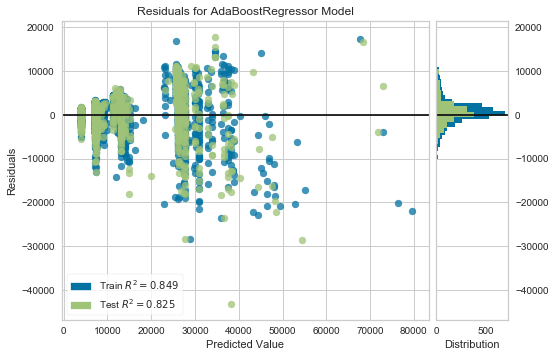

In [31]:
plot_model(tuned_ada)

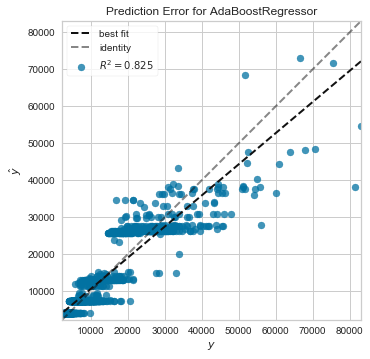

In [32]:
plot_model(tuned_ada, plot='error')

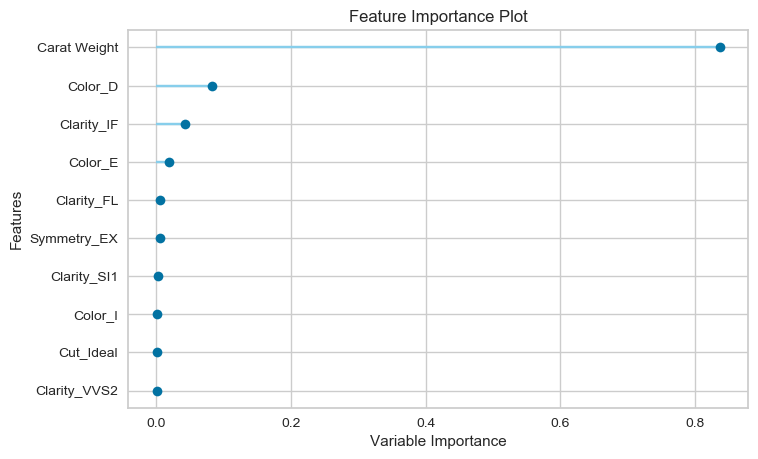

In [33]:
# plot important features
plot_model(tuned_ada, plot='feature')

In [34]:
# making prediction in the valdation dataset
predict_model(tuned_ada)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,2753.5560,19239427.3255,4386.2772,0.8245,0.2717,0.2331


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,...,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,1.16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7059,7289.223684
1,1.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5809,7262.857419
2,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,10641,8881.645401
3,0.79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2871,4021.384309
4,2.23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,21706,27516.784226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12906,7311.014368
1617,0.83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3235,4021.384309
1618,1.51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9058,12837.652605
1619,1.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5091,7289.223684


In [35]:
# making prediction in the test dataset
test_prediction = predict_model(tuned_ada, data=data_test)

In [36]:
test_prediction.head() # label is the prediction

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13004.518519
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,13004.518519
2,1.01,Good,E,SI1,G,G,GIA,5161,7153.337150
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,30896.385321
4,1.01,Good,I,SI1,VG,VG,GIA,4238,7153.337150


In [37]:
# save the model
save_model(tuned_ada, 'Regression_Model_Ada')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       float_dtype='float32', id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical='not_available',
                                 fill_value_...
                 ('dummy', Dummify(target='Price')),
                 ('fix_perfect', Remove_100(target='Price')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passt

In [38]:
# loading the model
saved_final_model = load_model('Regression_Model_Ada')

Transformation Pipeline and Model Successfully Loaded


In [39]:
prediction = predict_model(saved_final_model, data=data_test)

In [40]:
prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13004.518519
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,13004.518519
2,1.01,Good,E,SI1,G,G,GIA,5161,7153.337150
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,30896.385321
4,1.01,Good,I,SI1,VG,VG,GIA,4238,7153.337150
